In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [208]:
#Loading merged data
HumanA = pd.read_csv('/Users/tracysanchezpacheco/Documents/Resources/humanA_Behavioural.csv')
HumanA.drop('Unnamed: 0', axis=1, inplace=True)
HumanA.dropna(axis=0, inplace=True)
HumanA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6701 entries, 0 to 6702
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               6701 non-null   float64
 1   Alter                            6701 non-null   float64
 2   Global                           6701 non-null   float64
 3   Overview                         6701 non-null   float64
 4   Cardinal                         6701 non-null   float64
 5   AffiliativeQ_average             6701 non-null   float64
 6   ContextQ_average                 6701 non-null   float64
 7   avatar_action_likert             6701 non-null   int64  
 8   avatar_standing_likert           6701 non-null   int64  
 9   AbsolutError                     6701 non-null   float64
 10  SignedAngle-+180                 6701 non-null   float64
 11  IQR                              6701 non-null   float64
 12  RT                  

In [209]:
#Changing type of variables
HumanA['ID']= HumanA['ID'].astype("int")
#Eliminating participant that did not comply with the experimental protocol
HumanAf = HumanA[HumanA['ID'] != 4623]

## Absolut Error

In [210]:
#Median absolut error by participant
absolut_error_sorted = pd.DataFrame(HumanAf.groupby('ID')['AbsolutError'].median().sort_values())
absolut_error_sorted.head()

AbsolutError
ID                
4176     11.354629
7412     13.389626
6642     20.799179
9601     23.612308
2258     23.817124

In [211]:
#General plotting settings
sns.set(rc={"figure.figsize":(12, 8)})
sns.set(font_scale = 1.3)
plt.tight_layout()

<Figure size 864x576 with 0 Axes>

Text(0, 0.5, 'Absolut pointing error in degrees')

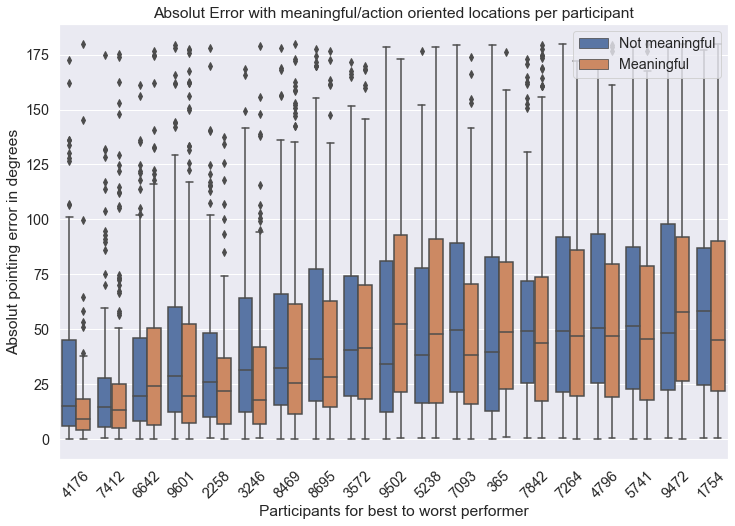

In [212]:
sns.boxplot(x='ID', y='AbsolutError', hue='meaningfulBuilding', data=HumanAf, order=absolut_error_sorted.index.values)
plt.legend(loc='upper right')
plt.title('Absolut Error with meaningful/action oriented locations per participant')
plt.xlabel('Participants for best to worst performer')
plt.xticks(rotation = 45)
plt.ylabel('Absolut pointing error in degrees')

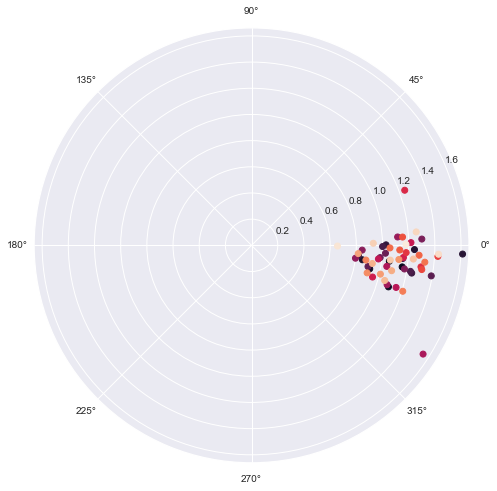

In [213]:
# Create a summary table with the median error for all locations
median_avatar_id = pd.DataFrame(HumanAf.groupby('avatarID')['SignedAngle-+180'].agg(['median','std']))
median_avatar_id['MedianRadians'] = [math.radians(median) for median in median_avatar_id['median']]
median_avatar_id['STDRadians'] = [math.radians(std) for std in median_avatar_id['std']]

# plotting the circle
plt.axes(projection='polar')
plt.scatter('MedianRadians', 'STDRadians', data=median_avatar_id, c=median_avatar_id.index.values)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# display the Polar plot
plt.show()

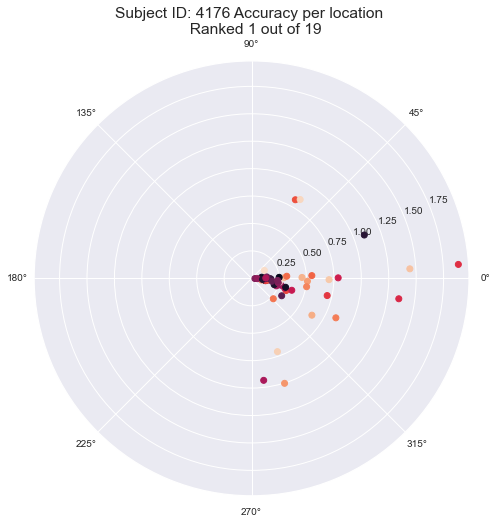

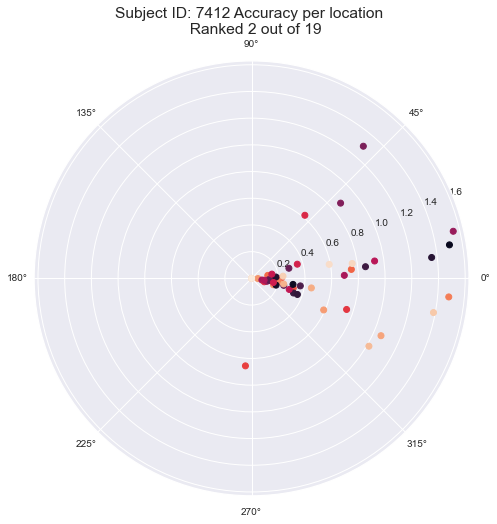

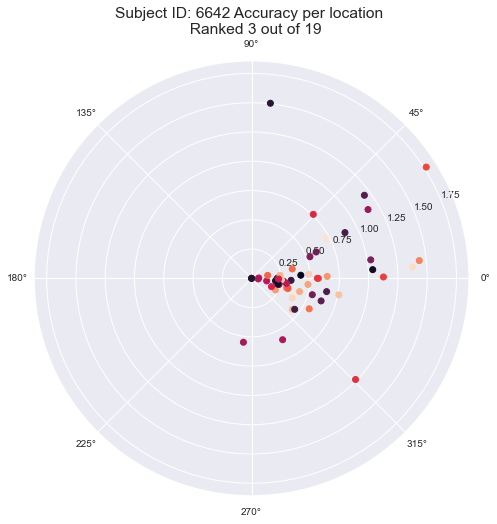

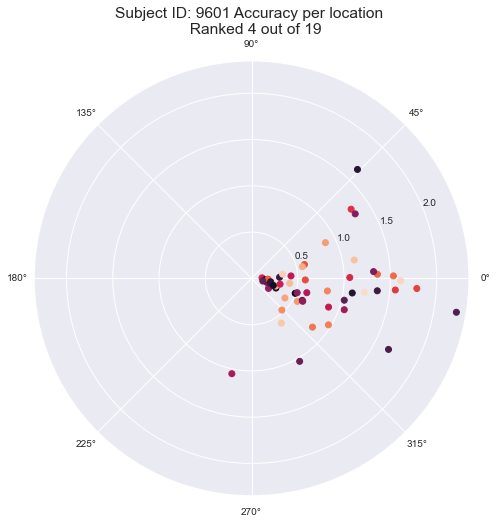

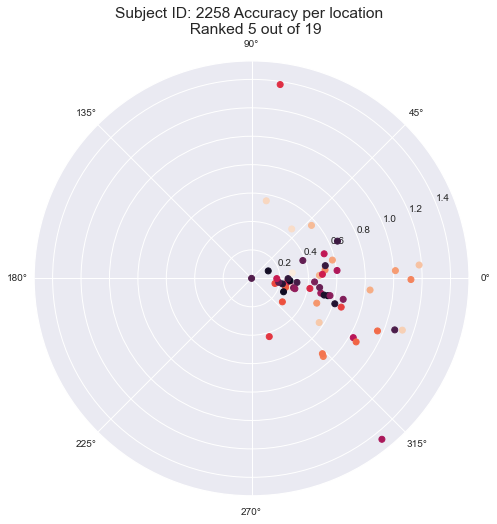

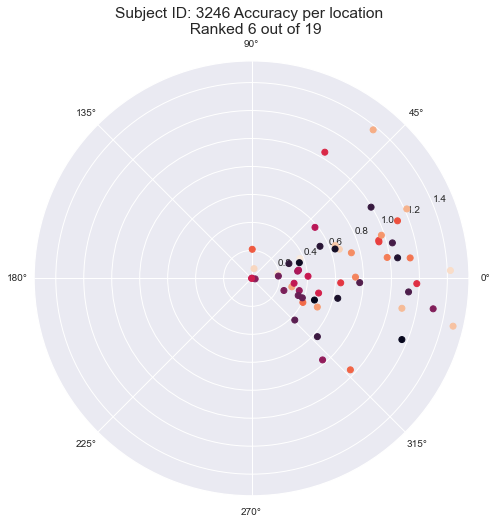

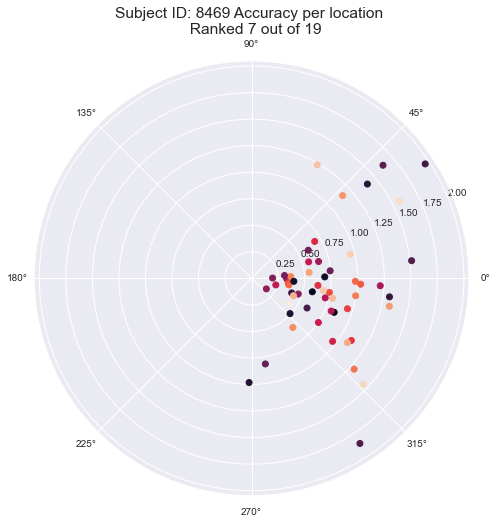

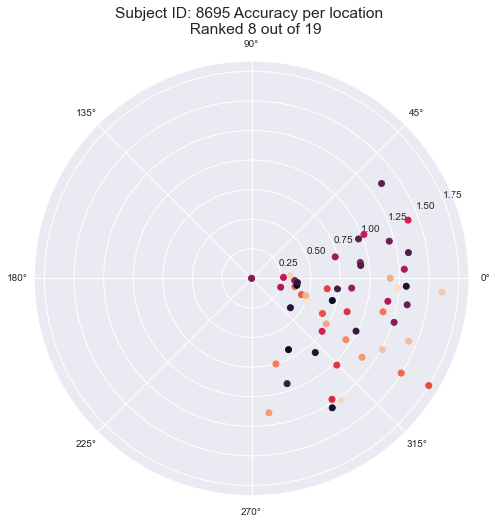

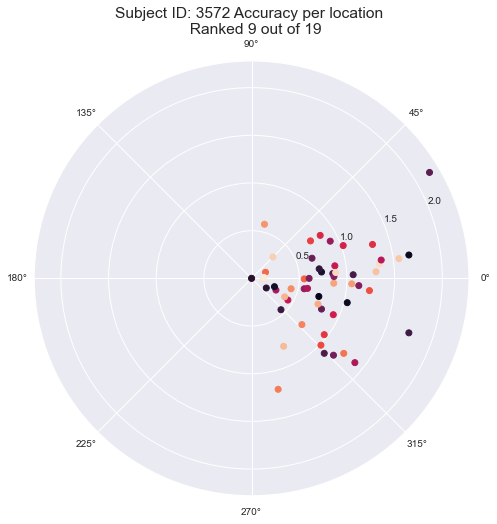

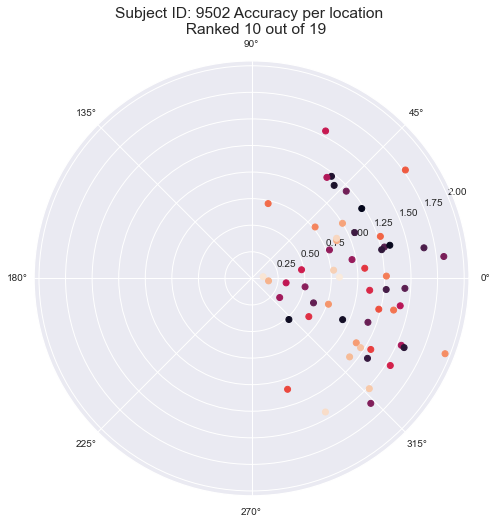

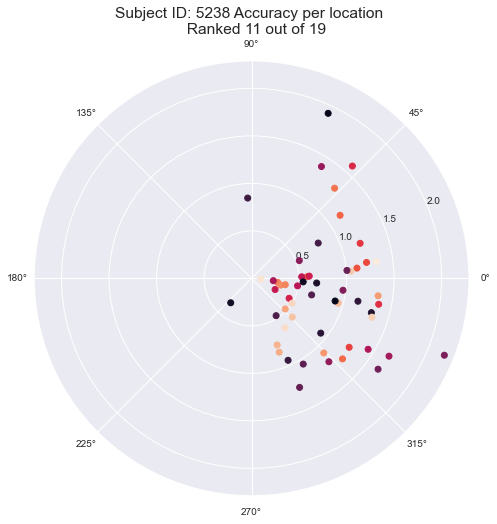

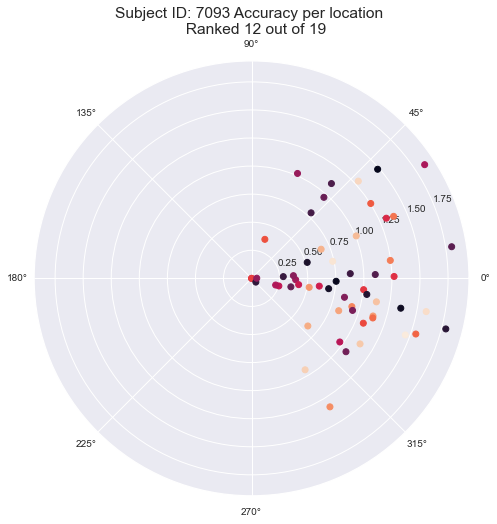

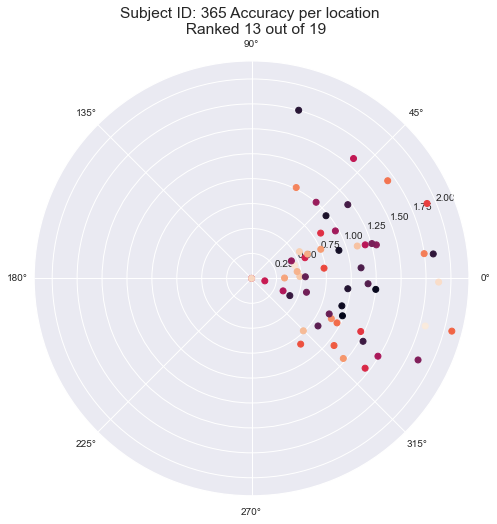

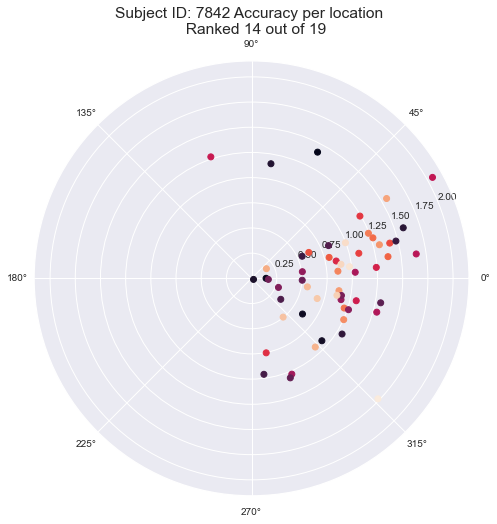

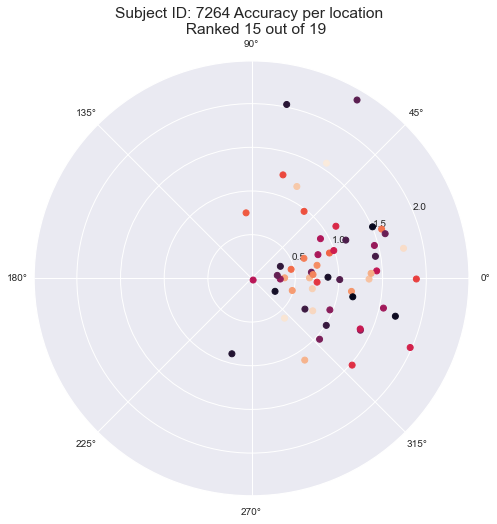

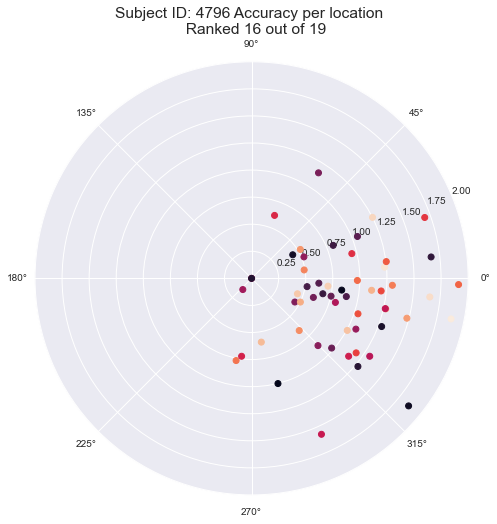

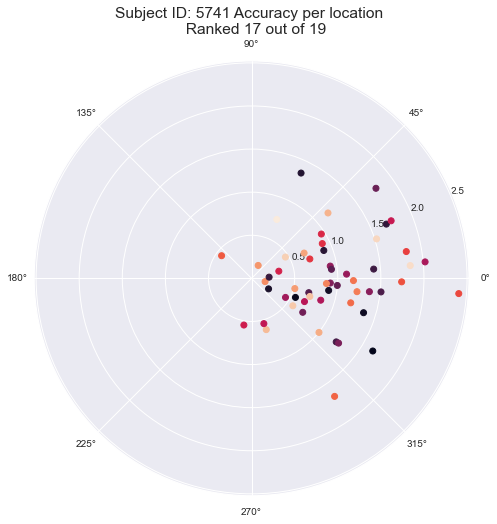

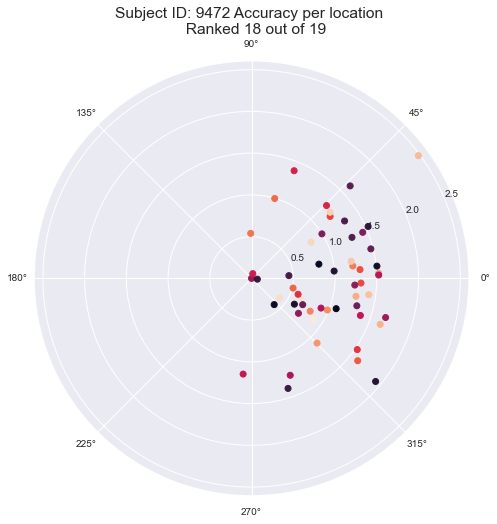

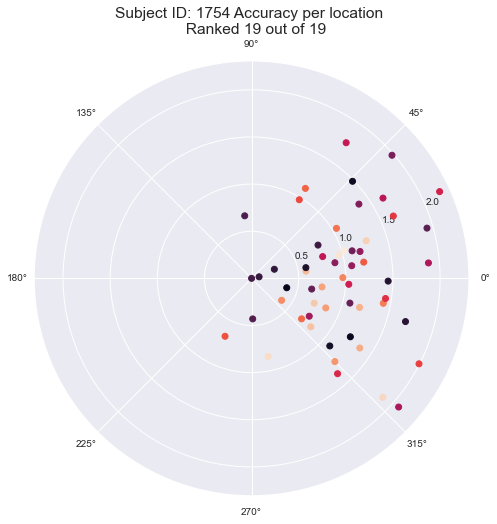

In [214]:
iterator = 0
rows =round(len(absolut_error_sorted)/2)
for subject in absolut_error_sorted.index.values:
    rads = []
    dur = []
    buildings = []
    dev = HumanAf[HumanAf.ID == subject]
    iterator += 1
    for building in dev.avatarID.unique():
        rads = rads + [math.radians(np.average(dev[dev.avatarID == building]['SignedAngle-+180']))]
        dur = dur + [math.radians(np.std(dev[dev.avatarID == building]['SignedAngle-+180']))]
        buildings = buildings + [int(building)]
    # plotting the circle
    fig, axes = plt.subplots(subplot_kw={'projection': 'polar'})
    plt.title("Subject ID: " + str(subject) + " Accuracy per location \n  Ranked " + str(iterator) + ' out of ' + str(len(absolut_error_sorted)))
    plt.scatter(rads, dur, c=buildings)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # display the Polar plot
    plt.show()

## Response Time

In [215]:
RT_sorted = pd.DataFrame(HumanAf.groupby('ID')['RT'].median().sort_values())
RT_sorted.head()

RT
ID            
7842  3.467534
7093  3.694836
9472  3.959314
2258  4.494768
365   4.503181

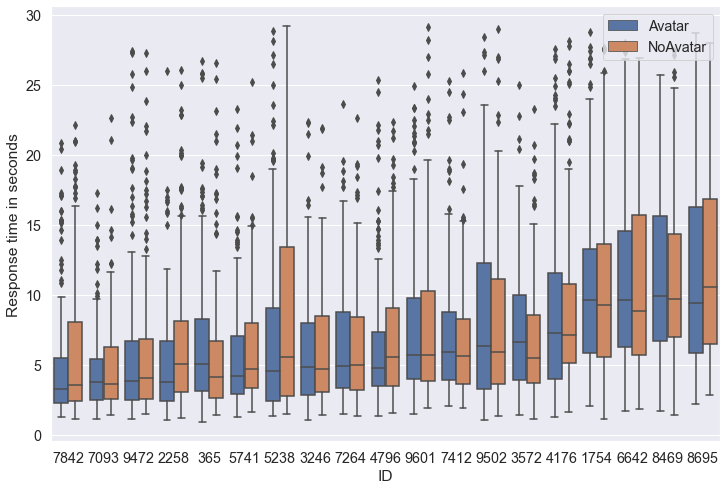

In [216]:
sns.boxplot(x='ID', y='RT', hue='AvatarPresenceCategory', data=HumanAf, order=RT_sorted.index.values)
plt.ylabel('Response time in seconds')
plt.legend(loc='upper right')

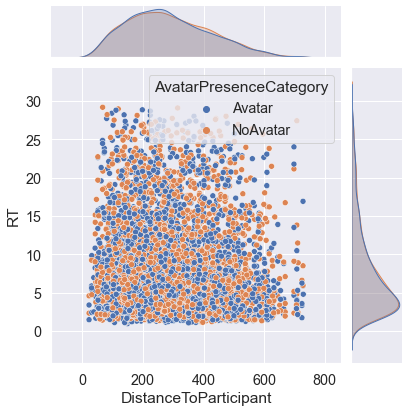

In [217]:
sns.jointplot(x='DistanceToParticipant', y='RT', hue='AvatarPresenceCategory', data=HumanAf)

## Distance

Text(0, 0.5, 'Absolut pointing error to target in degrees ')

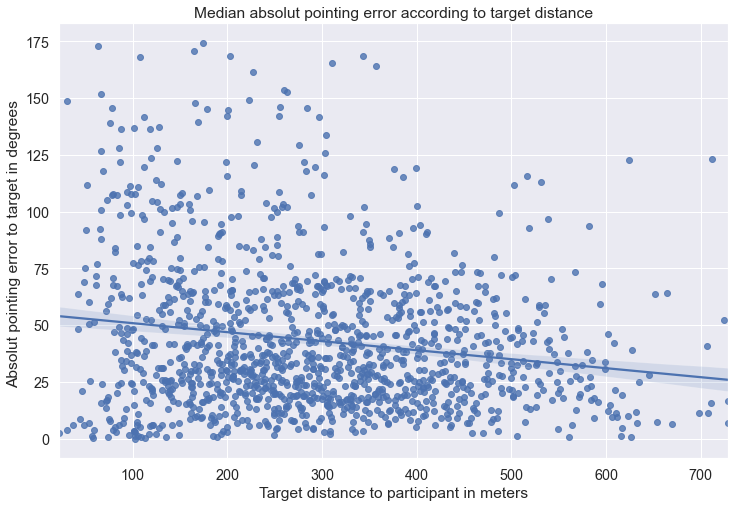

In [218]:
rounded_distances = pd.DataFrame(HumanAf.groupby(HumanAf['DistanceToParticipant'].apply(lambda x: round(x, 1)))["AbsolutError"].median())
rounded_distances.reset_index(inplace=True)
sns.regplot(x="DistanceToParticipant", y="AbsolutError", data=rounded_distances)
plt.title('Median absolut pointing error according to target distance')
plt.xlabel('Target distance to participant in meters')
plt.ylabel('Absolut pointing error to target in degrees ')

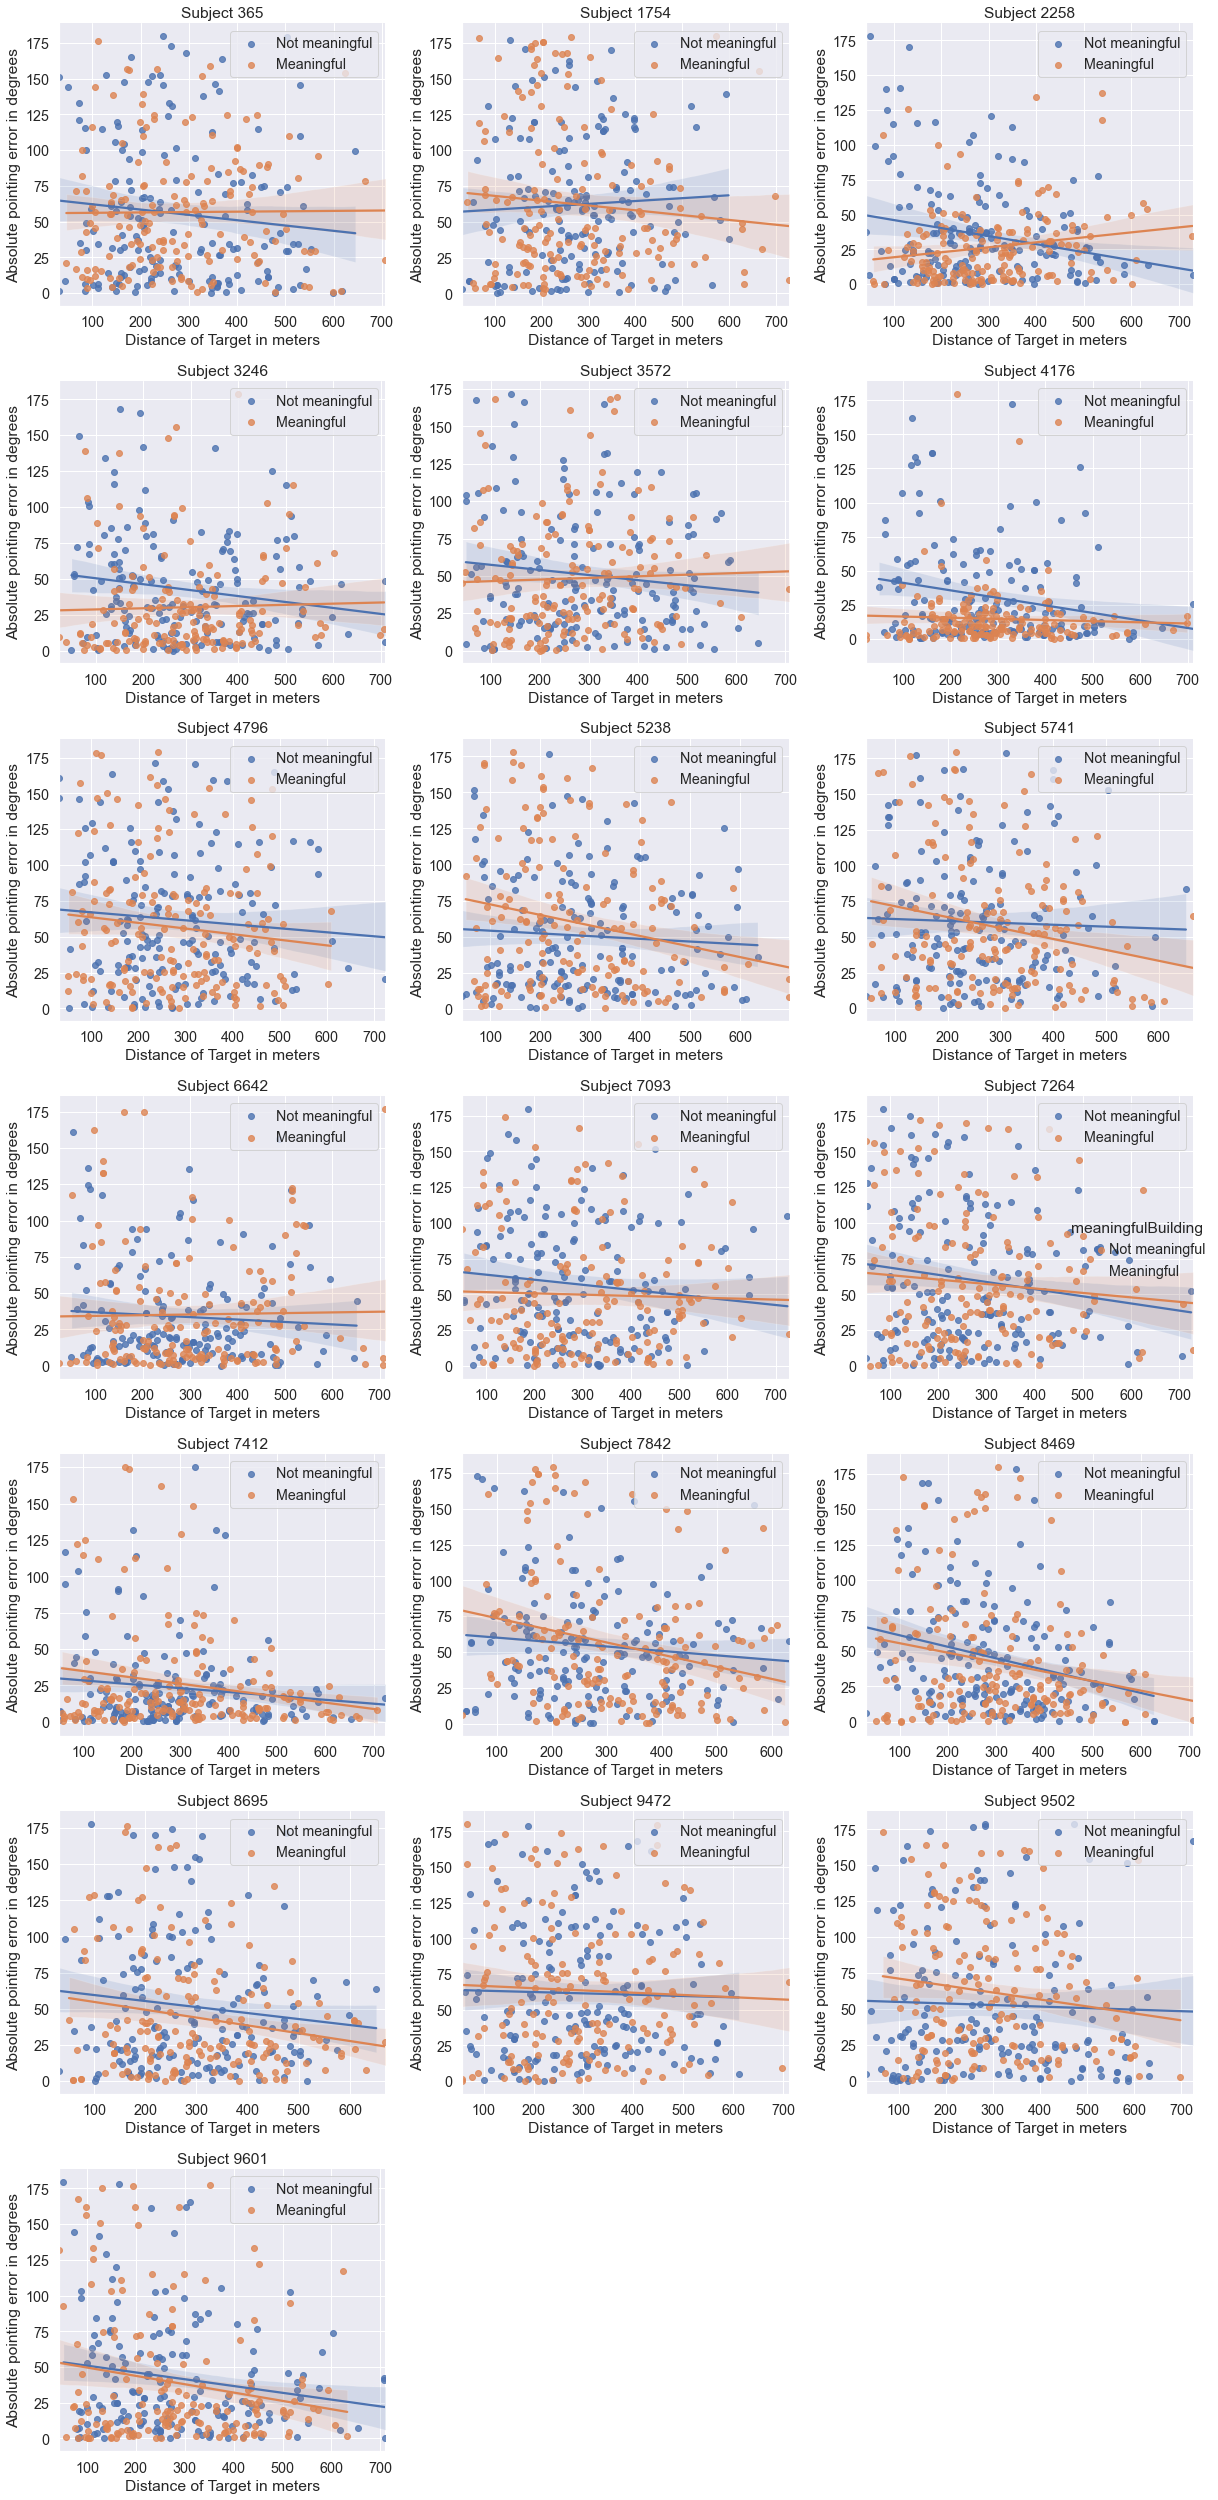

In [219]:
g = sns.lmplot(x="DistanceToParticipant", y="AbsolutError", data=HumanAf, hue='meaningfulBuilding',col="ID", col_wrap=3, sharex=False, sharey=False)
g.set_titles("Subject {col_name}")

for ax in g.axes.ravel():
    ax.legend(loc='upper right')
    ax.set_xlabel("Distance of Target in meters")
    ax.set_ylabel('Absolute pointing error in degrees')

plt.tight_layout()

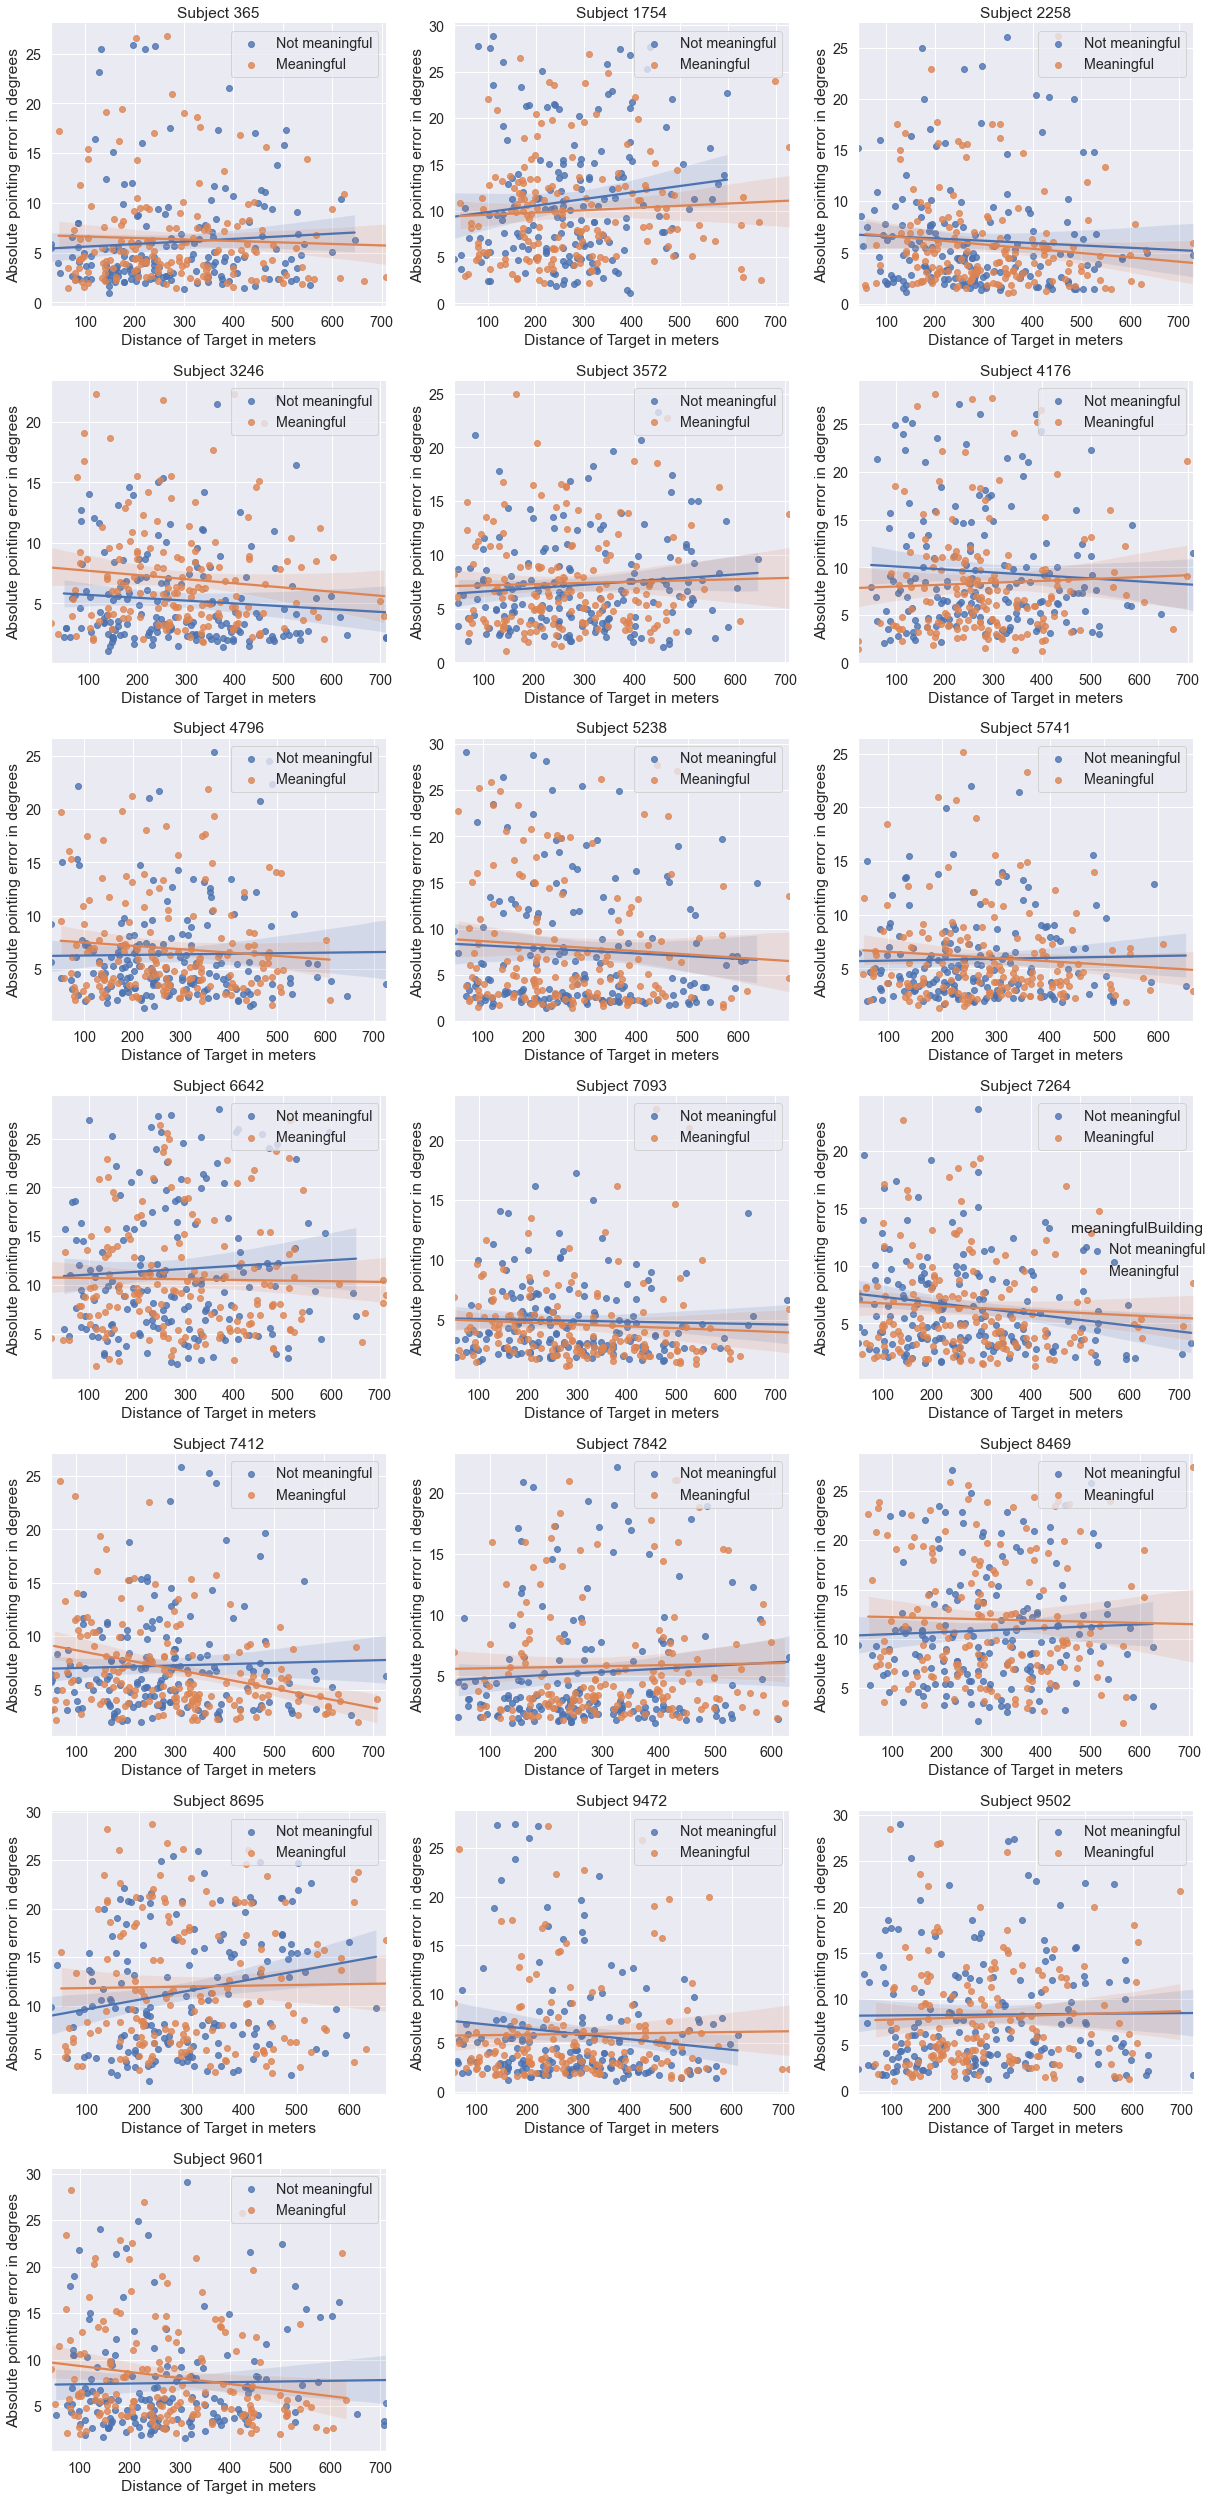

In [220]:
g = sns.lmplot(x="DistanceToParticipant", y="RT", data=HumanAf, hue='meaningfulBuilding',col="ID", col_wrap=3, sharex=False, sharey=False)
g.set_titles("Subject {col_name}")

for ax in g.axes.ravel():
    ax.legend(loc='upper right')
    ax.set_xlabel("Distance of Target in meters")
    ax.set_ylabel('Absolute pointing error in degrees')

plt.tight_layout()

## Order effects

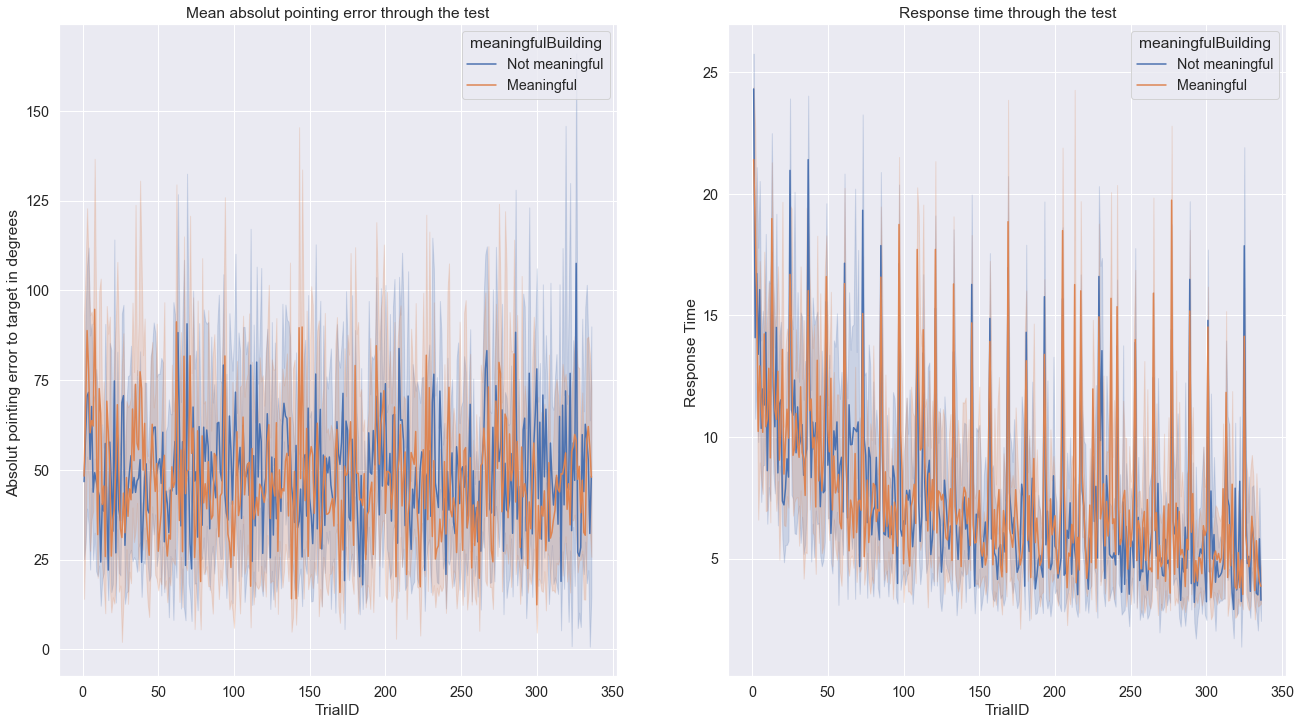

In [221]:
fig, axes = plt.subplots(1,2, figsize=(22,12))
sns.lineplot(data=HumanAf, x="TrialID", y="AbsolutError", hue='meaningfulBuilding' , estimator='mean', ci=95, ax=axes[0])
sns.lineplot(data=HumanAf, x="TrialID", y="RT", hue='meaningfulBuilding' , estimator='mean', ci=95, ax=axes[1])
axes[0].set_title('Mean absolut pointing error through the test')
axes[1].set_title('Response time through the test')
axes[0].set_ylabel('Absolut pointing error to target in degrees ')
axes[1].set_ylabel('Response Time ')
ax.legend(loc='upper right')

Text(0, 0.5, 'Response Time ')

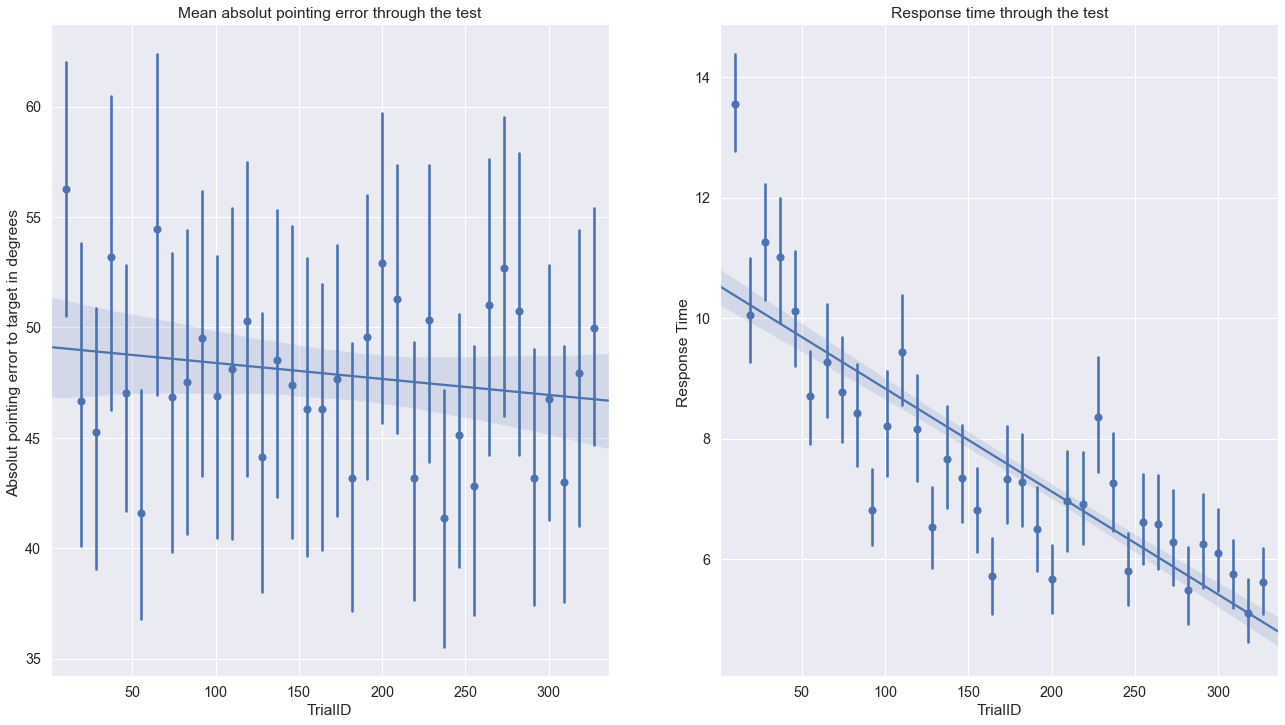

In [222]:
fig, axes = plt.subplots(1,2, figsize=(22,12))
sns.regplot(data=HumanAf, x="TrialID", y="AbsolutError", x_bins=36, ax=axes[0])
sns.regplot(data=HumanAf, x="TrialID", y="RT", x_bins=36, ax=axes[1])
axes[0].set_title('Mean absolut pointing error through the test')
axes[1].set_title('Response time through the test')
axes[0].set_ylabel('Absolut pointing error to target in degrees ')
axes[1].set_ylabel('Response Time ')

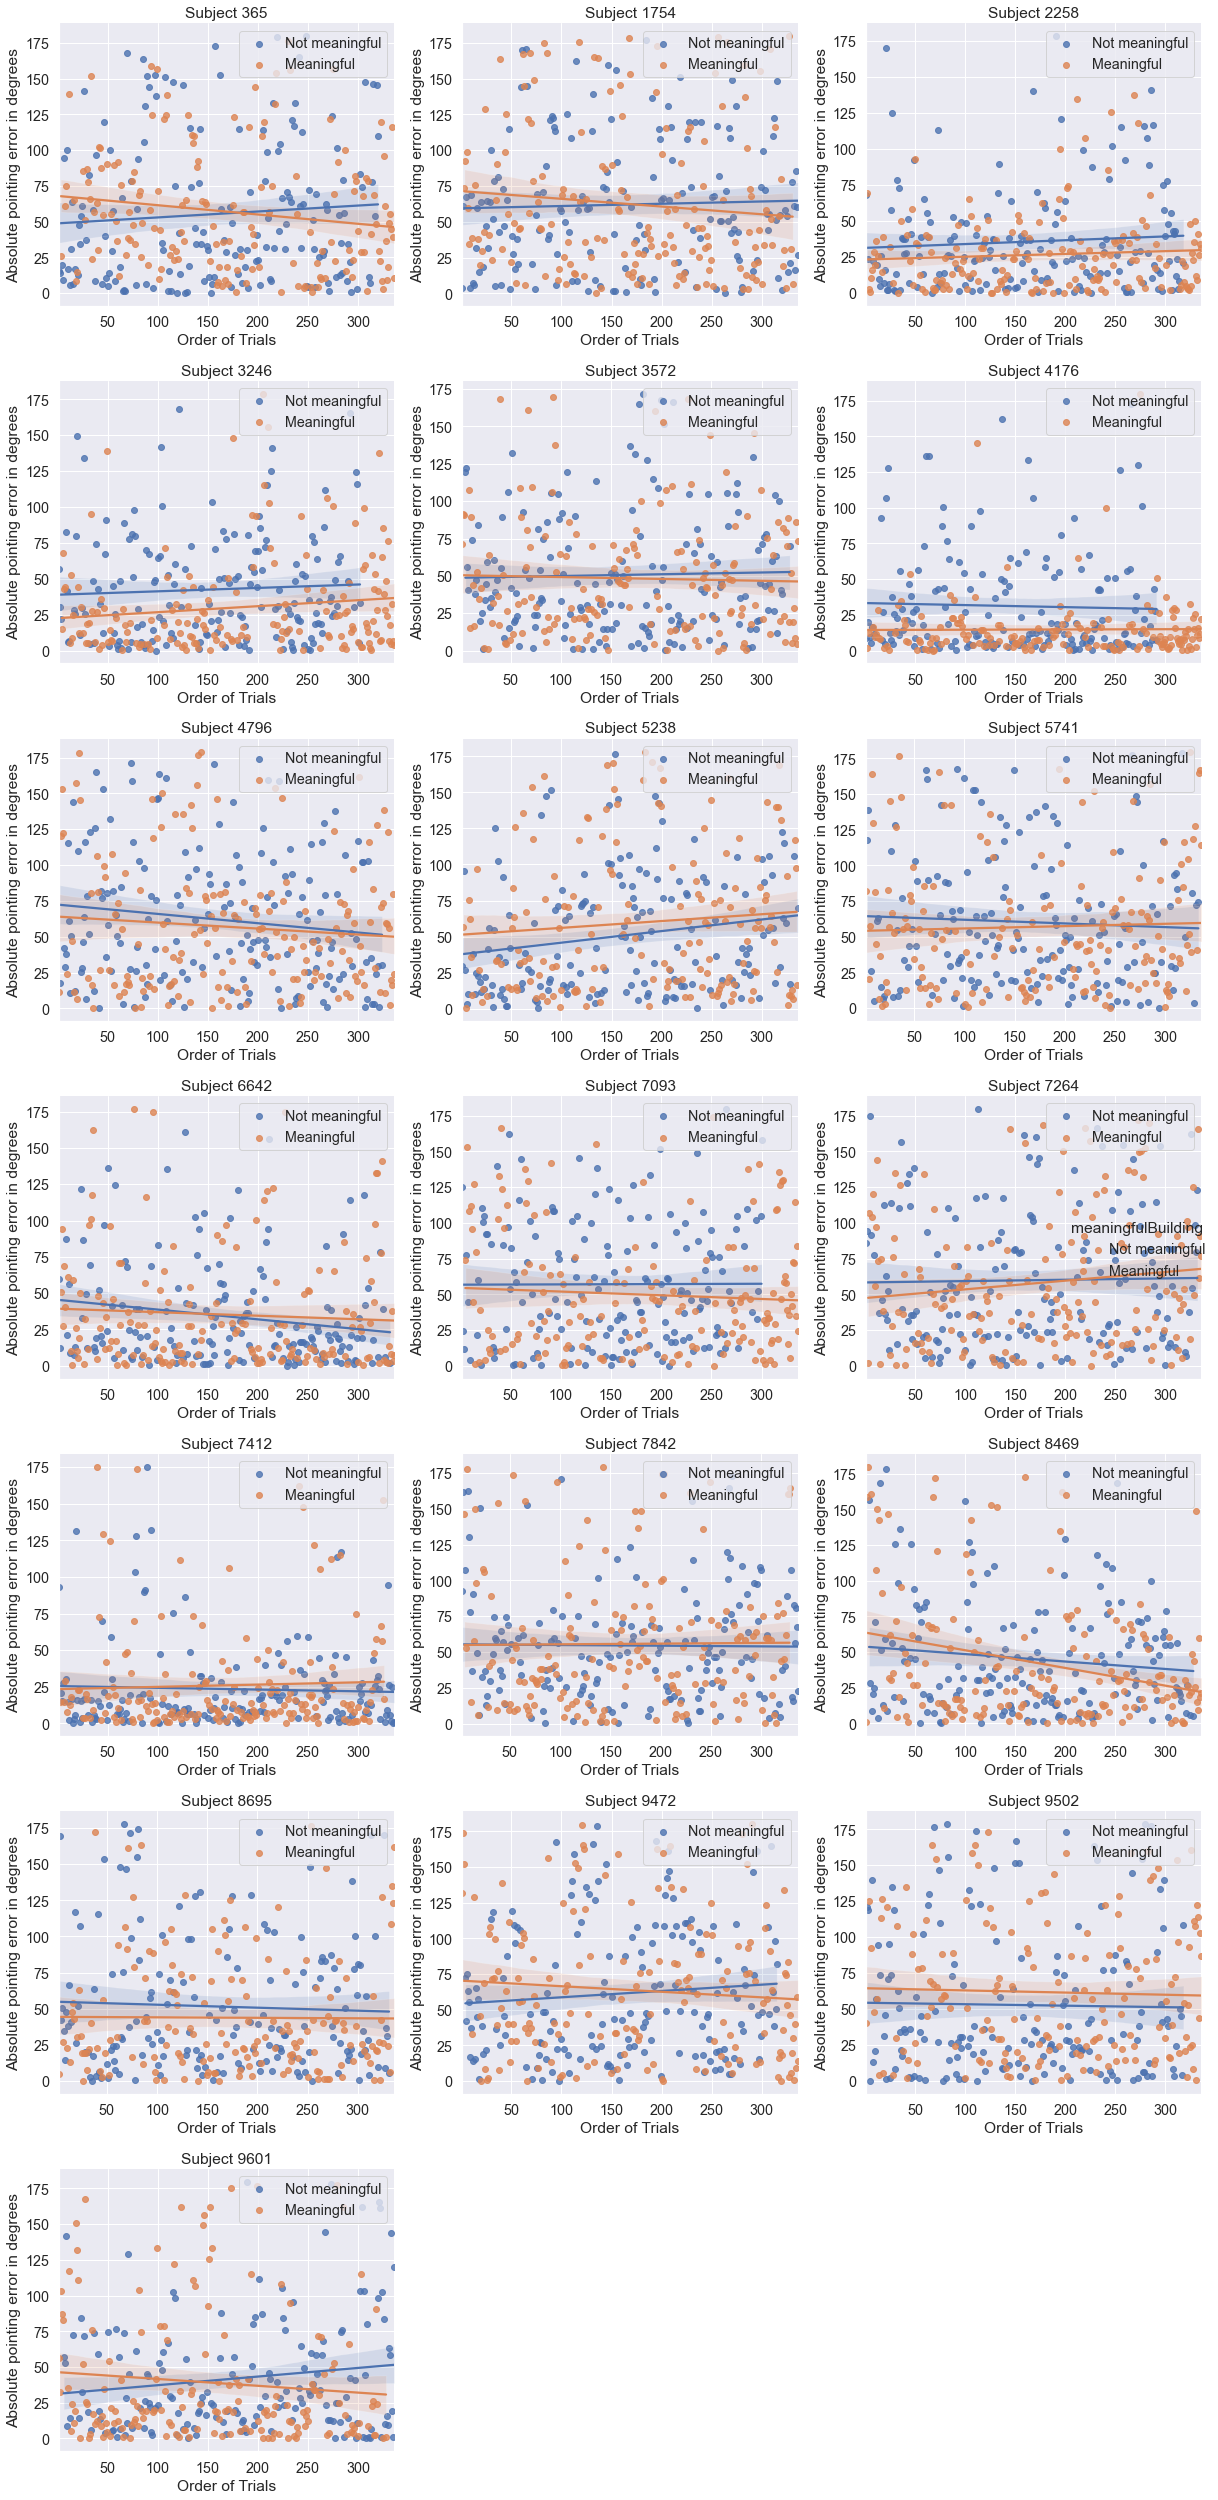

In [223]:
g = sns.lmplot(x="TrialID", y="AbsolutError", data=HumanAf, hue='meaningfulBuilding',col="ID", col_wrap=3, sharex=False, sharey=False)
g.set_titles("Subject {col_name}")

for ax in g.axes.ravel():
    ax.legend(loc='upper right')
    ax.set_xlabel("Order of Trials")
    ax.set_ylabel('Absolute pointing error in degrees')

plt.tight_layout()

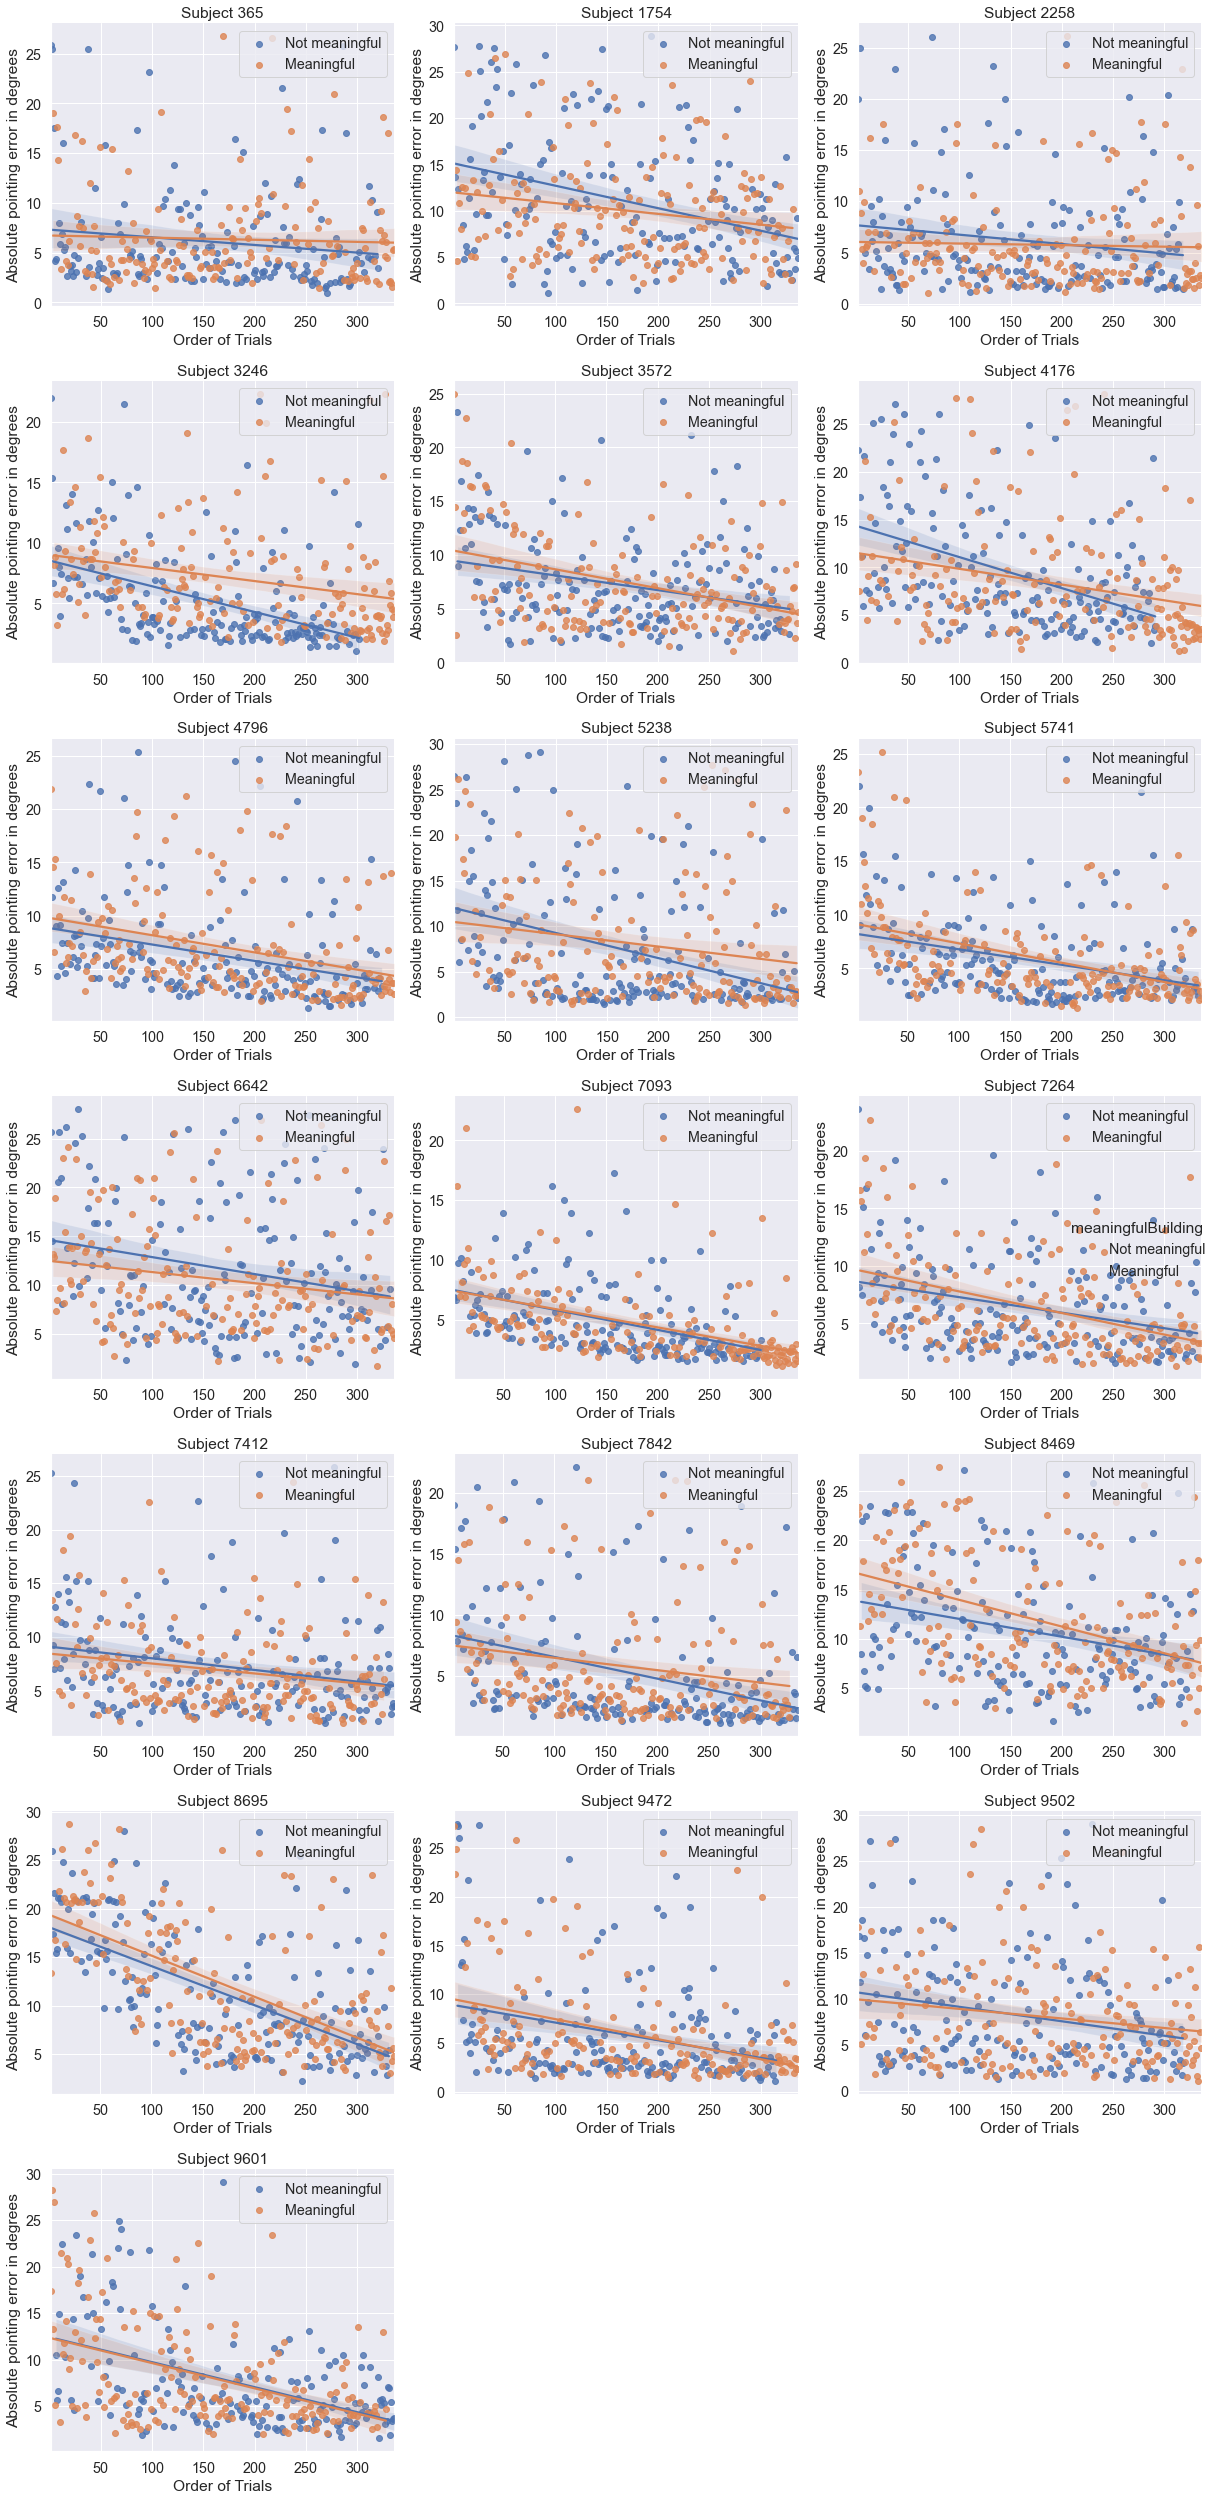

In [224]:
g = sns.lmplot(x="TrialID", y="RT", data=HumanAf, hue='meaningfulBuilding',col="ID", col_wrap=3, sharex=False, sharey=False)
g.set_titles("Subject {col_name}")

for ax in g.axes.ravel():
    ax.legend(loc='upper right')
    ax.set_xlabel("Order of Trials")
    ax.set_ylabel('Absolute pointing error in degrees')

plt.tight_layout()

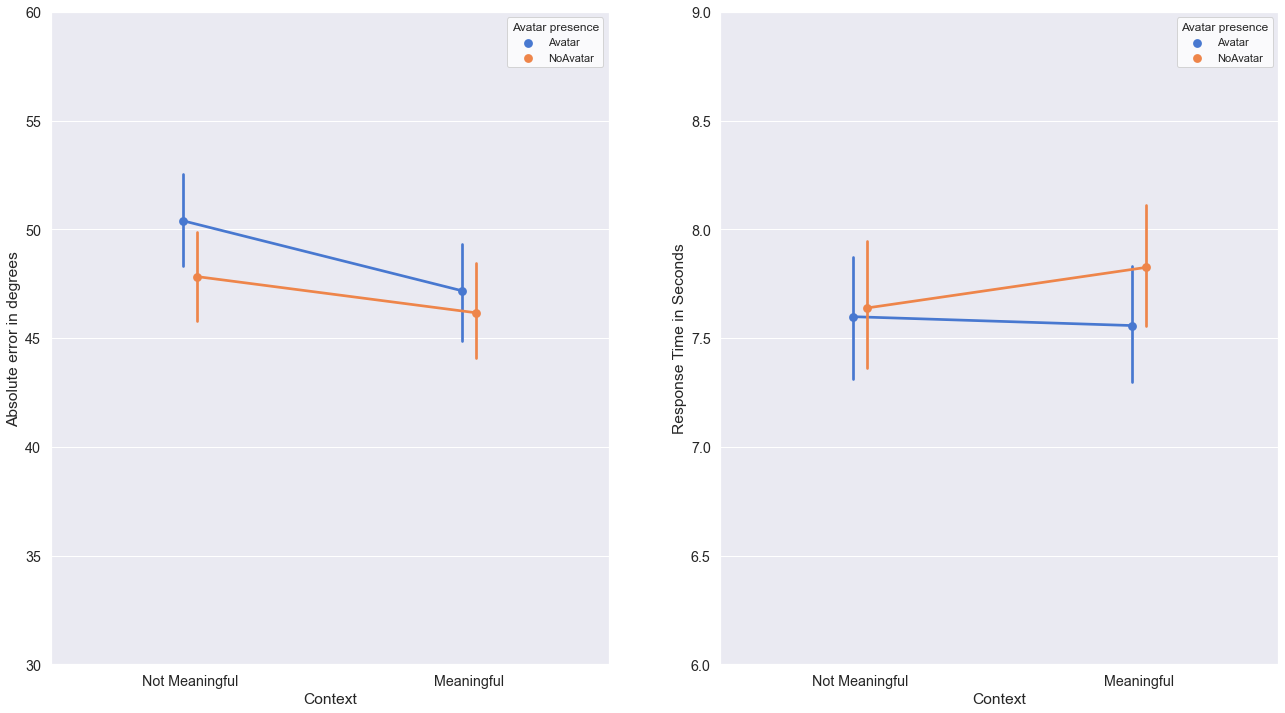

In [225]:
fig, axes = plt.subplots(1,2, figsize=(22,12))

sns.pointplot(x='Context', y='AbsolutError', hue='AvatarPresenceCategory', dodge=True, data=HumanAf, ci=95, ax=axes[0])
axes[0].set_xticklabels(['Not Meaningful', 'Meaningful'])
axes[0].set_ylabel('Absolute error in degrees')
axes[0].set_ylim(30, 60)
axes[0].legend(title='Avatar presence', loc='upper right')

sns.pointplot(x='Context', y='RT', hue='AvatarPresenceCategory', dodge=True, data=HumanAf, ci=95, ax=axes[1])
axes[1].set_xticklabels(['Not Meaningful', 'Meaningful'])
axes[1].set_ylabel('Response Time in Seconds')
axes[1].set_ylim(6, 9)
axes[1].legend(title='Avatar presence', loc='upper right')

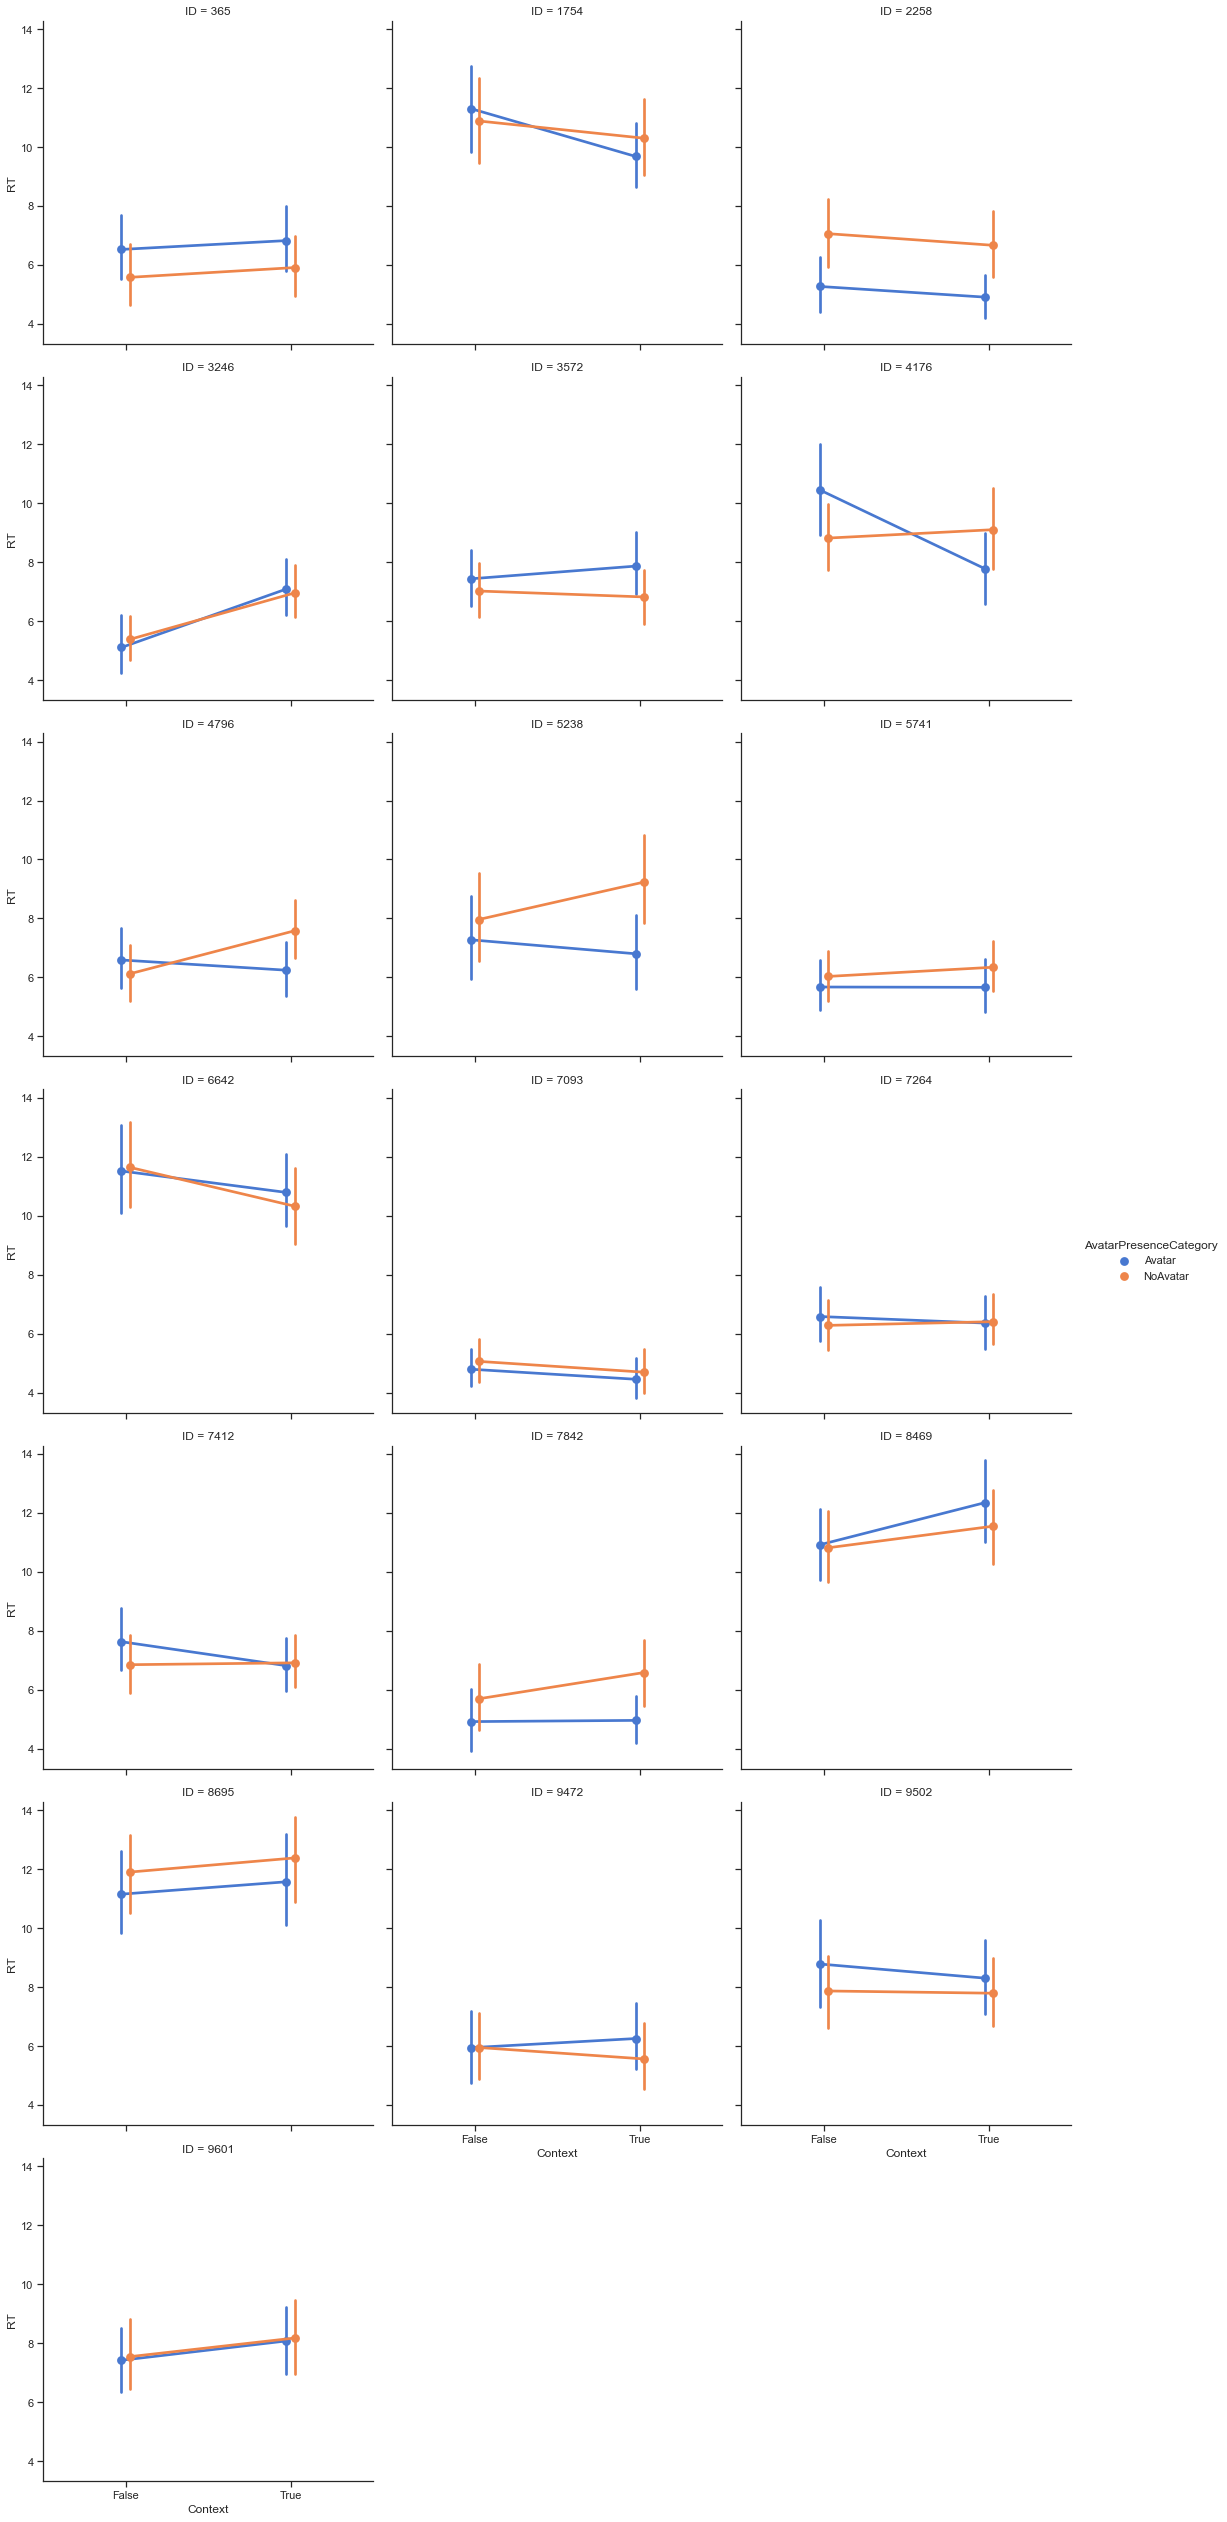

In [229]:
sns.set_palette('muted')
g = sns.catplot(x='Context', y='RT', hue='AvatarPresenceCategory', dodge=True, data=HumanAf, ci=95, col="ID", col_wrap=3,
                kind="point");


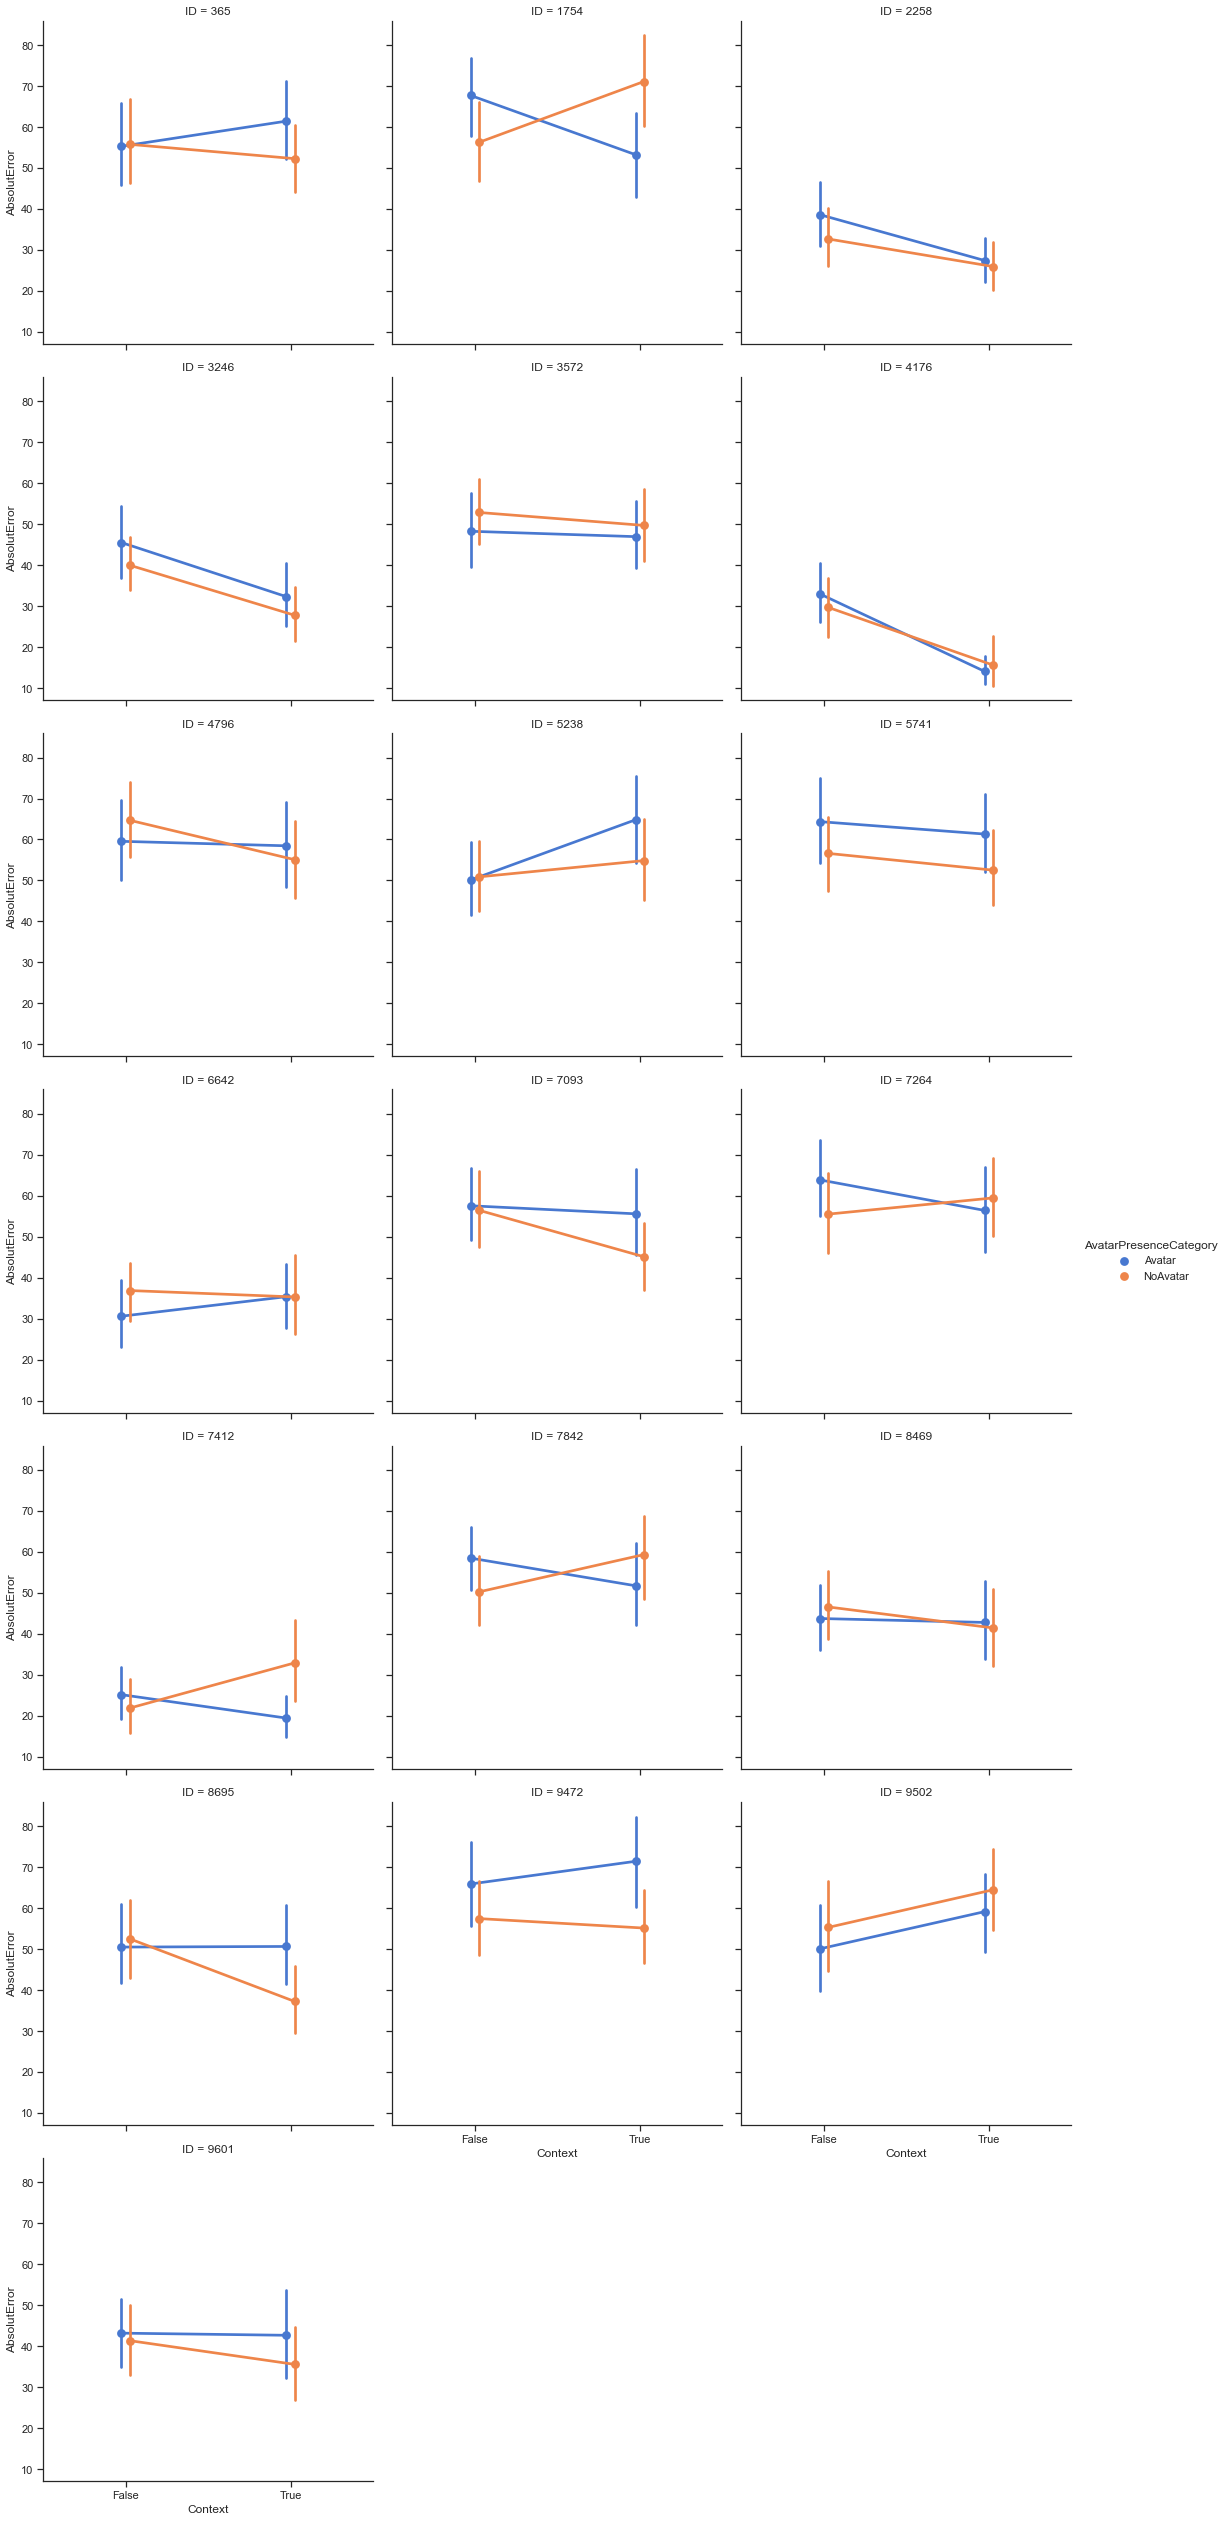

In [227]:
g = sns.catplot(x='Context', y='AbsolutError', hue='AvatarPresenceCategory', dodge=True, data=HumanAf, ci=95, col="ID", col_wrap=3,
                kind="point");

In [227]:
g = sns.lmplot(x="TrialID", y="AbsolutError", data=HumanAf, hue='meaningfulBuilding',col="ID", col_wrap=3, sharex=False, sharey=False)
g.set_titles("Subject {col_name}")

for ax in g.axes.ravel():
    ax.legend(loc='upper right')
    ax.set_xlabel("Order of Trials")
    ax.set_ylabel('Absolute pointing error in degrees')

plt.tight_layout()

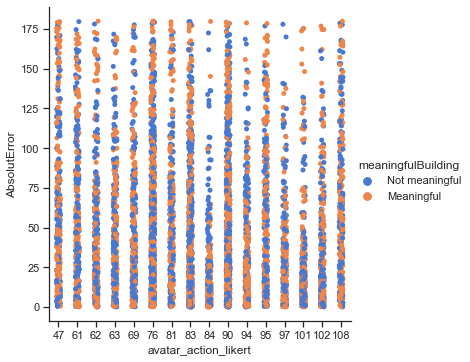

In [231]:
g = sns.catplot(x="avatar_action_likert", y="AbsolutError", data=HumanAf, hue='meaningfulBuilding', sharex=False, sharey=False)